In [0]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [0]:
num_words_ = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=num_words_)
num_classes = len(np.unique(train_labels))

print(train_data.shape)
print(test_data.shape)
print(train_data[0])
print(train_labels.shape)
print(test_labels.shape)

(8982,)
(2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
(8982,)
(2246,)


In [0]:
# One hot encoding word indices
def vectorize_sequences(sequences, dimension=num_words_):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train.shape

(8982, 10000)

In [0]:
# One hot encoding of target labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words_,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) # 46 dim vector output / Softmax for multiclass probabilities

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # Multiclass Loss function
              metrics=['accuracy'])


In [0]:
# Validation split
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
# Training & Validation
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 310us/sample - loss: 2.5681 - accuracy: 0.5154 - val_loss: 1.7195 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 50us/sample - loss: 1.4098 - accuracy: 0.7081 - val_loss: 1.2978 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 0s 50us/sample - loss: 1.0502 - accuracy: 0.7765 - val_loss: 1.1439 - val_accuracy: 0.7660
Epoch 4/20
7982/7982 [==============================] - 0s 49us/sample - loss: 0.8294 - accuracy: 0.8262 - val_loss: 1.0553 - val_accuracy: 0.7780
Epoch 5/20
7982/7982 [==============================] - 0s 53us/sample - loss: 0.6569 - accuracy: 0.8659 - val_loss: 0.9662 - val_accuracy: 0.7980
Epoch 6/20
7982/7982 [==============================] - 0s 51us/sample - loss: 0.5231 - accuracy: 0.8936 - val_loss: 0.9472 - val_accuracy: 0.7980
Epoch 7/20
7982/7982 [==============================] - 0s 51us/sampl

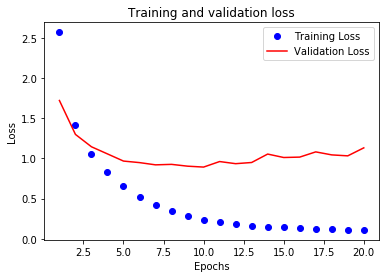

In [0]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1 )

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

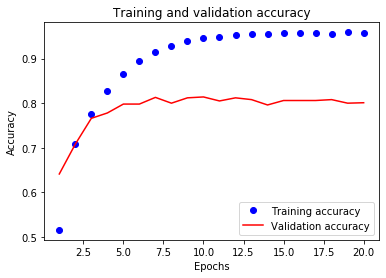

In [0]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The trained neural net begins overfitting after approximately 9 epochs, so we will retrain on all train data and stop after 9 epochs.

In [0]:
# Retrain model on all training data - 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(num_words_,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          one_hot_train_labels,
          batch_size=512,
          epochs=9)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 8982 samples
Epoch 1/9
8982/8982 [==============================] - 1s 80us/sample - loss: 2.6733 - accuracy: 0.5489
Epoch 2/9
8982/8982 [==============================] - 0s 44us/sample - loss: 1.3660 - accuracy: 0.7237
Epoch 3/9
8982/8982 [==============================] - 0s 44us/sample - loss: 0.9996 - accuracy: 0.7892
Epoch 4/9
8982/8982 [==============================] - 0s 45us/sample - loss: 0.7761 - accuracy: 0.8361
Epoch 5/9
8982/8982 [==============================] - 0s 47us/sample - loss: 0.6034 - accuracy: 0.8750
Epoch 6/9
8982/8982 [==============================] - 0s 45us/sample - loss: 0.4817 - accuracy: 0.9002
Epoch 7/9
8982/8982 [==============================] - 0s 45us/sample - loss: 0.3892 - accuracy: 0.9162
Epoch 8/9
8982/8982 [==============================] - 0s 45us/sample - loss: 0.3172 - accuracy: 0.9305
Epoch 9/9
2246/2246 [==============================] - 0s 152us/sample - loss: 0.9616 - accuracy: 0.7983
[0.9616235117772172, 0.7983081]
